# Relation between Life Expectancy, GDP and % of GDP spent in Education.

## Importing libraries

In [1]:
import altair as alt
import pandas as pd
import numpy as np

## Getting the data

In [2]:
!ls

01_styles.ipynb
02_seaborn.ipynb
03_bokeh.ipynb
04_d3.ipynb
05_widgets.ipynb
06_altair.ipynb
Altair_extracredit.ipynb
chart.json
Data_Extract_From_World_Development_Indicators.zip
df.json
ExerciseData-OlympicMedallists.csv
Exercise_with_Bokeh_CSC324.ipynb
graph.json
lge.csv
lge.tar
life_exp_gdp_edu.csv
life_exp_gdp_edu_metadata.csv
seaborn_exercise.ipynb
Untitled1.ipynb
Untitled.ipynb


In [3]:
lge_original_csv = pd.read_csv('life_exp_gdp_edu.csv')

In [4]:
lge_original_csv.head(5)

,Country Name,Country Code,"2017 [YR2017] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",2017 [YR2017] - GDP per capita (current US$) [NY.GDP.PCAP.CD],2017 [YR2017] - Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]
0,Afghanistan,AFG,64.13,556.302138508508,2.58346697515129
1,Albania,ALB,78.333,4532.88919785143,3.56614561464118
2,Algeria,DZA,76.499,4048.28525822561,4.4671956
3,American Samoa,ASM,..,11398.7774181949,11.760709
4,Andorra,AND,..,39134.3933706717,2.44


In [5]:
lge_original_csv.describe()

,Country Name,Country Code,"2017 [YR2017] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",2017 [YR2017] - GDP per capita (current US$) [NY.GDP.PCAP.CD],2017 [YR2017] - Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]
count,266,264,264,264,264
unique,266,264,244,245,228
top,Central Europe and the Baltics,CYM,..,..,..
freq,1,1,19,18,32


We change the column names to shorter ones.

In [6]:
lge_original_csv.rename(
    columns = {
        'Country Name' : 'Cname',
        'Country Code' : 'Ccode',
        '2017 [YR2017] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]' : 'Expectancy',
        '2017 [YR2017] - GDP per capita (current US$) [NY.GDP.PCAP.CD]' : 'GDP',
        '2017 [YR2017] - Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]' : 'education'
    },
    inplace = True
)

In [7]:
lge_original_csv.head(5)

,Cname,Ccode,Expectancy,GDP,education
0,Afghanistan,AFG,64.13,556.302138508508,2.58346697515129
1,Albania,ALB,78.333,4532.88919785143,3.56614561464118
2,Algeria,DZA,76.499,4048.28525822561,4.4671956
3,American Samoa,ASM,..,11398.7774181949,11.760709
4,Andorra,AND,..,39134.3933706717,2.44


### Filtering Information to Remove Blanks

Here we create the filters by comparing the contents against the string '..' that was used in the original dataset to express "No Data Available".

In [8]:
lexp = lge_original_csv['Expectancy'] != '..'
gdp = lge_original_csv['GDP'] != '..'
edu = lge_original_csv['education'] != '..'

In [9]:
lexp.head(5)

0     True
1     True
2     True
3    False
4    False
Name: Expectancy, dtype: bool

Filtering out the rows with at least one '..' and at the same time erasing all NaNs produced by the filtering.

In [10]:
lge_clean = lge_original_csv[lexp & gdp & edu].dropna()

In [11]:
lge_clean.head(5)

,Cname,Ccode,Expectancy,GDP,education
0,Afghanistan,AFG,64.13,556.302138508508,2.58346697515129
1,Albania,ALB,78.333,4532.88919785143,3.56614561464118
2,Algeria,DZA,76.499,4048.28525822561,4.4671956
5,Angola,AGO,60.379,4095.81294155857,3.57
6,Antigua and Barbuda,ATG,76.752,15824.6678131824,2.25


In [12]:
lge_clean.describe()

,Cname,Ccode,Expectancy,GDP,education
count,217,217,217,217,217
unique,217,217,216,216,213
top,Central Europe and the Baltics,SAS,69.1713119009688,1867.27224804395,2.07546880725027
freq,1,1,2,2,2


We will extract the information from the relevant columns and then convert the text to floating point numbers.

In [13]:
l_series = lge_clean['Expectancy'].astype(float)
g_series = lge_clean['GDP'].astype(float)
e_series = lge_clean['education'].astype(float)
name_series = lge_clean['Cname']

In [14]:
l_series.head(5)

0    64.130
1    78.333
2    76.499
5    60.379
6    76.752
Name: Expectancy, dtype: float64

We need to create a dataframe with the numerical columns we obtained.

In [15]:
df=pd.concat([name_series, l_series, g_series, e_series],axis=1)

In [16]:
df.head(5)

,Cname,Expectancy,GDP,education
0,Afghanistan,64.130,556.302139,2.583467
1,Albania,78.333,4532.889198,3.566146
2,Algeria,76.499,4048.285258,4.467196
5,Angola,60.379,4095.812942,3.570000
6,Antigua and Barbuda,76.752,15824.667813,2.250000


In [17]:
df.describe()

,Expectancy,GDP,education
count,217.000000,217.000000,217.000000
mean,72.235864,13859.412826,4.310711
std,7.455831,18575.104452,2.244613
min,52.240000,293.009062,0.850000
25%,67.252000,1867.272248,2.920000
50%,73.689000,6006.360622,4.085382
75%,77.632000,16076.082038,5.079850
max,84.680488,104498.738671,23.628830


We begin by creating a simple scatter plot.

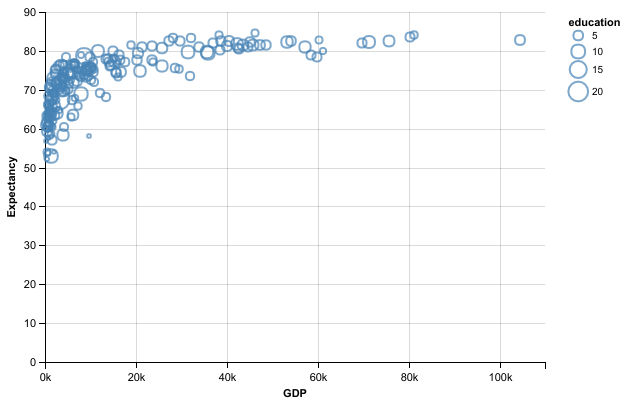

In [18]:
alt.Chart(df).mark_point().encode(
    x='GDP',
    y='Expectancy',
    size='education',
)